In [2]:
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [4]:
o_outfits= pd.read_csv('./datathon/dataset/outfit_data.csv')
o_product = pd.read_csv('./datathon/dataset/product_data.csv')

outfits = o_outfits.copy()
product = o_product.copy()

In [12]:
def getProduct(idx):
    print("DATOS DEL PRODUCTO")
    print(product.iloc[idx])
    print('APPEARING IN:')
    code = product.iloc[idx].cod_modelo_color
    print(list(outfits[outfits.cod_modelo_color==code]['cod_outfit'].unique()))
    print('IMAGE')
    image_path =product.loc[idx]['des_filename']
    img = cv2.imread(image_path)
    plt.imshow(img)


DATOS DEL PRODUCTO
cod_modelo_color                                          41085800-02
cod_color_code                                                     02
des_color_specification_esp                                  OFFWHITE
des_agrup_color_eng                                             WHITE
des_sex                                                        Female
des_age                                                         Adult
des_line                                                          SHE
des_fabric                                                    P-PLANA
des_product_category                                          Bottoms
des_product_aggregated_family                     Trousers & leggings
des_product_family                                           Trousers
des_product_type                                             Trousers
des_filename                     datathon/images/2019_41085800_02.jpg
Name: 0, dtype: object
APPEARING IN:
[1769, 1396, 683]
IMAGE


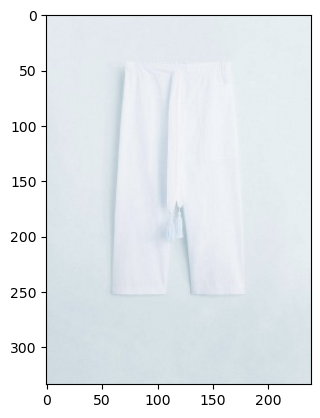

In [13]:
getProduct(0)

## Cleaning data 

In [43]:
#Deleting all the products that are not clothes
product = product[(product.des_product_category!= 'Beauty') & (product.des_product_category!= 'Home')]
# Delete all products for men and kids due to desbalance
product = product[(product.des_line== 'SHE')]
product = product[(product.des_sex== 'Female')]
product = product[(product.des_age== 'Adult')]

product =product.drop(['des_sex','des_line','des_age'], axis = 1)

# Delete the deleted products from outfits
outfits = outfits[outfits.cod_modelo_color.isin(product.cod_modelo_color.unique())]

In [44]:
outfits = outfits[outfits.cod_modelo_color.isin(product.cod_modelo_color.unique())]

In [60]:
product

,cod_modelo_color,cod_color_code,des_color_specification_esp,des_agrup_color_eng,des_fabric,des_product_category,des_product_aggregated_family,des_product_family,des_product_type,des_filename
0,41085800-02,02,OFFWHITE,WHITE,P-PLANA,Bottoms,Trousers & leggings,Trousers,Trousers,datathon/images/2019_41085800_02.jpg
1,53000586-TO,TO,TEJANO OSCURO,BLUE,J-JEANS,Bottoms,Jeans,Jeans,Jeans,datathon/images/2019_53000586_TO.jpg
2,53030601-81,81,ROSA PASTEL,PINK,P-PLANA,"Dresses, jumpsuits and Complete set",Dresses and jumpsuits,Dresses,Dress,datathon/images/2019_53030601_81.jpg
3,53050730-15,15,MOSTAZA,YELLOW,P-PLANA,"Dresses, jumpsuits and Complete set",Dresses and jumpsuits,Dresses,Dress,datathon/images/2019_53050730_15.jpg
4,53070773-70,70,ROJO,RED,P-PLANA,Tops,Shirts,Shirt,Shirt,datathon/images/2019_53070773_70.jpg
...,...,...,...,...,...,...,...,...,...,...
9217,57066027-99,99,NEGRO,GREY,P-PLANA,"Dresses, jumpsuits and Complete set",Dresses and jumpsuits,Dresses,Dress,datathon/images/2023_57066027_99.jpg
9218,57076028-92,92,GRIS,GREY,P-PLANA,Bottoms,Skirts and shorts,Shorts,Shorts,datathon/images/2023_57076028_92.jpg
9219,57068275-05,05,CRUDO,WHITE,C-COMPLEMENTOS,"Accesories, Swim and Intimate",Swim and intimate,Intimate,Socks,datathon/images/2023_57068275_05.jpg
9220,57067125-78,78,BURDEOS,RED,K-CIRCULAR,"Dresses, jumpsuits and Complete set",Dresses and jumpsuits,Dresses,Dress,datathon/images/2023_57067125_78.jpg


In [48]:
product.des_fabric.value_counts()

des_fabric
P-PLANA           2996
C-COMPLEMENTOS    2515
K-CIRCULAR        1558
T-TRICOT          1260
J-JEANS            606
O-POLIPIEL          97
L-PIEL              71
Name: count, dtype: int64

In [54]:
product[product['des_fabric']=='O-POLIPIEL']

,cod_modelo_color,cod_color_code,des_color_specification_esp,des_agrup_color_eng,des_fabric,des_product_category,des_product_aggregated_family,des_product_family,des_product_type,des_filename
469,53073765-99,99,NEGRO,GREY,O-POLIPIEL,Bottoms,Skirts and shorts,Skirts,Skirt,datathon/images/2019_53073765_99.jpg
564,57095134-30,30,MARRON,BROWN,O-POLIPIEL,Outerwear,Jackets and Blazers,Blazers,Blazer,datathon/images/2023_57095134_30.jpg
776,57037656-37,37,KHAKI,BROWN,O-POLIPIEL,Bottoms,Skirts and shorts,Skirts,Skirt,datathon/images/2019_57037656_37.jpg
846,57095968-99,99,NEGRO,GREY,O-POLIPIEL,Bottoms,Skirts and shorts,Skirts,Skirt,datathon/images/2023_57095968_99.jpg
879,57055951-99,99,NEGRO,GREY,O-POLIPIEL,Outerwear,Coats and Parkas,Trenchcoats,Trenchcoat,datathon/images/2023_57055951_99.jpg
...,...,...,...,...,...,...,...,...,...,...
9003,57035137-99,99,NEGRO,GREY,O-POLIPIEL,Outerwear,Jackets and Blazers,Jackets,Jacket,datathon/images/2023_57035137_99.jpg
9004,57015138-30,30,MARRON,BROWN,O-POLIPIEL,Outerwear,Jackets and Blazers,Jackets,Jacket,datathon/images/2023_57015138_30.jpg
9083,53043767-99,99,NEGRO,GREY,O-POLIPIEL,Bottoms,Skirts and shorts,Skirts,Skirt,datathon/images/2019_53043767_99.jpg
9084,53063767-99,99,NEGRO,GREY,O-POLIPIEL,"Dresses, jumpsuits and Complete set",Dresses and jumpsuits,Dresses,Dress,datathon/images/2019_53063767_99.jpg


DATOS DEL PRODUCTO
cod_modelo_color                                          57027718-08
cod_color_code                                                     08
des_color_specification_esp                                     BEIGE
des_agrup_color_eng                                             WHITE
des_fabric                                                 K-CIRCULAR
des_product_category                                        Outerwear
des_product_aggregated_family                     Jackets and Blazers
des_product_family                                            Jackets
des_product_type                                               Jacket
des_filename                     datathon/images/2023_57027718_08.jpg
Name: 572, dtype: object
APPEARING IN:
[3838, 4305]
IMAGE


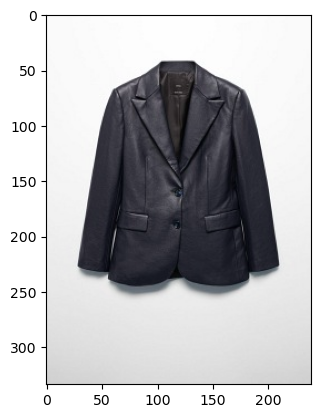

In [57]:
getProduct(564)

In [85]:
def printOufit(outfit):
    listaPrednas =  outfits[outfits.cod_outfit==1]['cod_modelo_color'].unique()
    for i in listaPrednas:
        image_path =product[product.cod_modelo_color == i]['des_filename'].values[0]
        img = cv2.imread(image_path)
        plt.imshow(img)
        plt.show()

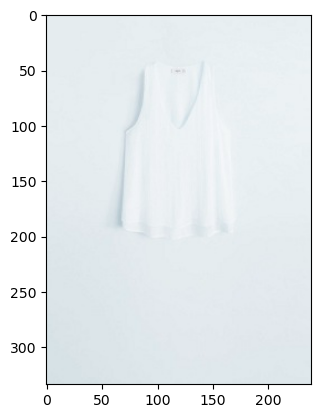

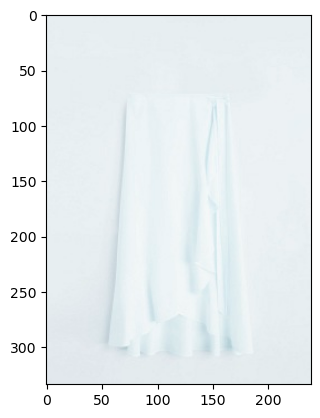

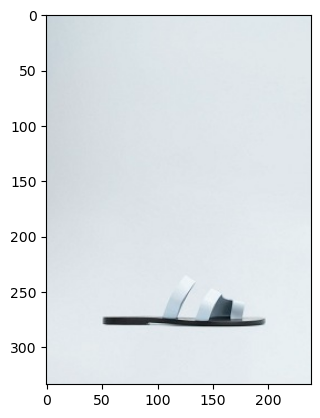

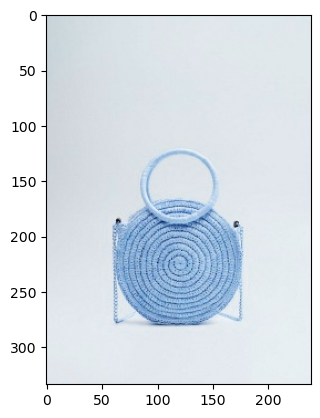

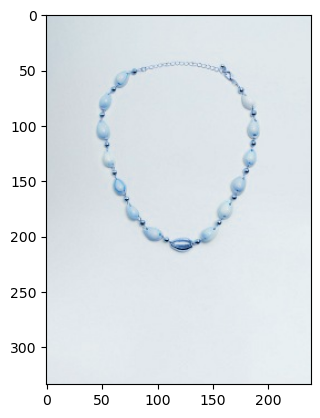

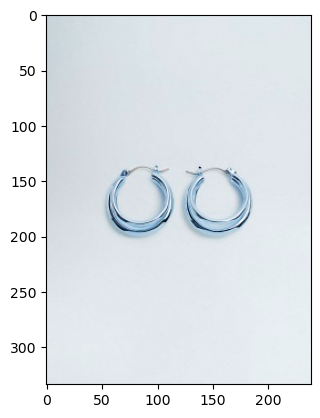

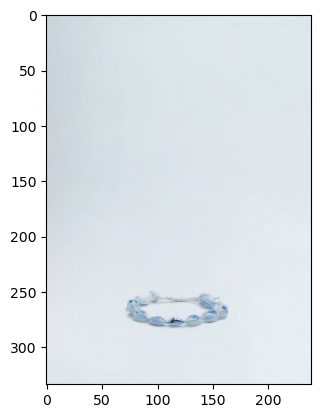

In [86]:
printOufit(0)